Plot the total slip on each fault patch for events in particular magnitude bins. Includes filtering the catalogue by time and allows a subset of faults to be selected.

In [1]:
# Import relevant modules
from rsqsim_api.catalogue.catalogue import RsqSimCatalogue
from rsqsim_api.fault.multifault import RsqSimMultiFault
import fnmatch
import os
import numpy as np

# # Tell python where field paths etc are relative to
script_dir = os.path.abspath('')
fault_dir = "../../../data/shaw2021/rundir5091"
catalogue_dir = fault_dir


Read in faults and earthquake catalogue.  The files are quite large and can be downloaded from https://doi.org/10.5281/zenodo.5534462

In [2]:
fault_model = RsqSimMultiFault.read_fault_file_bruce(os.path.join(script_dir, fault_dir, "zfault_Deepen.in"),
                                                     os.path.join(script_dir, fault_dir, "znames_Deepen.in"),
                                                     transform_from_utm=True)
whole_catalogue = RsqSimCatalogue.from_catalogue_file_and_lists(os.path.join(catalogue_dir, "eqs..out"),
                                                                list_file_directory=catalogue_dir, list_file_prefix="catalog")

Trim catalogue to remove start + be easier to process

In [3]:
short_catalogue=whole_catalogue.filter_whole_catalogue(min_t0=1e12)

Identify faults of interest and select events rupturing these faults.

In [4]:
#e.g. hope fault segments
faults2select = [name for name in fault_model.names if fnmatch.fnmatch(name, "hik*")]
#fault_selection=RsqSimMultiFault([fault_model.name_dic[faults2select[i]] for i in range(0,len(faults2select))])
fault_selection=RsqSimMultiFault([fault_model.name_dic[name] for name in faults2select])

Find events on these faults.

In [5]:
events_on_fault=short_catalogue.filter_by_fault(fault_selection, minimum_patches_per_fault=1)

Divide events into magnitude units.

In [6]:
# would be better to make a structure (dict?) to have the separate magnitude bins rather than separate entities
#N.b. >= lower bound < upper bound
events526=events_on_fault.filter_whole_catalogue(min_mw=5,max_mw=6)
events627=events_on_fault.filter_whole_catalogue(min_mw=6,max_mw=7)
events728=events_on_fault.filter_whole_catalogue(min_mw=7,max_mw=8)

In [7]:
# find slip on same patches + add up in each magnitude bin
for evlist in events526,events627,events728:
    #make dictionary of patchnumber: accumulated slip for a given catalogue
    evlist.assign_accumulated_slip()


#want to be able to do plotting of catalogue not only events - copy plotslip2d to catalogue and change section with patch numbers to accumulated slip

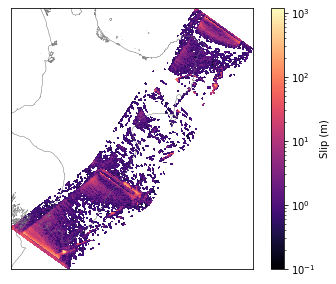

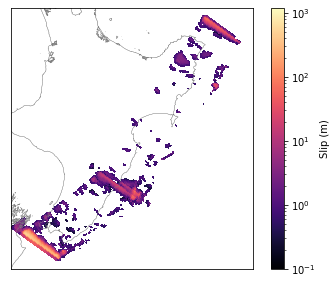

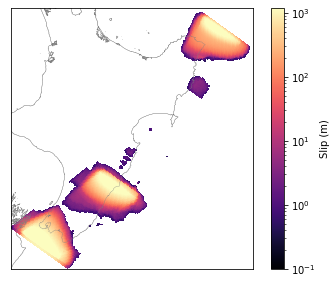

In [18]:
#plot an event 
fault_selection=RsqSimMultiFault([fault_model.name_dic[name] for name in faults2select])
events526.plot_accumulated_slip_2d(fault_model=fault_selection,write="slip526.png",plot_log_scale=True,\
                                   log_min=0.1, log_max=1200.)
events627.plot_accumulated_slip_2d(fault_model=fault_selection,write="slip627.png",plot_log_scale=True, \
                                   log_min=0.1, log_max=1200.)
events728.plot_accumulated_slip_2d(fault_model=fault_selection,write="slip728.png",plot_log_scale=True, \
                                   log_min=0.1, log_max=1200.)

In [ ]:
#write out shortened catalogue
short_catalogue.write_csv_and_arrays(prefix="short_cat",directory=catalogue_dir)